In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [21]:
data= pd.read_csv("../turning_patterns_into_profits/Data/Transactions_all_data.csv")

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,...,Rate,Tax,total_amt,Store_type,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,...,-772,405.300,-4265.300,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,...,-1497,785.925,-8270.925,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,...,-1363,429.345,-4518.345,e-Shop,NaN,NaN,NaN,NaN,NaN,NaN
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,...,-791,166.110,-1748.110,TeleShop,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.drop(["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis=1, inplace=True)

In [23]:
data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop


In [24]:
month_list=[]
year_list=[]
mo_yr_list=[]

for each_date in data['tran_date']:
    date= datetime.datetime.strptime(str(each_date), "%m/%d/%Y")
    month_list.append(date.month)
    year_list.append(date.year)
    mo_yr_list.append(f"{date.month}/{date.year}")

In [25]:
data["transaction_month"] = month_list
data["transaction_year"] = year_list
data["transaction_MoYr"] = mo_yr_list

data.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,transaction_month,transaction_year,transaction_MoYr
0,80712190438,270351,09/26/81,M,5,2/28/2014,Women,1,Clothing,1,-5,-772,405.300,-4265.300,e-Shop,2,2014,2/2014
1,29258453508,270384,11/05/73,F,8,2/27/2014,Computers,5,Electronics,3,-5,-1497,785.925,-8270.925,e-Shop,2,2014,2/2014
2,51750724947,273420,07/27/92,M,8,2/24/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014
3,93274880719,271509,08/06/81,M,3,2/24/2014,Children,11,Home and kitchen,6,-3,-1363,429.345,-4518.345,e-Shop,2,2014,2/2014
4,51750724947,273420,07/27/92,M,8,2/23/2014,DIY,6,Books,5,-2,-791,166.110,-1748.110,TeleShop,2,2014,2/2014


In [26]:
data1= data.loc[(data["transaction_month"]==1) & (data["prod_cat_code"]==1)]

In [27]:
data1.head()

,transaction_id,cust_id,DOB,Gender,city_code,tran_date,prod_subcat,prod_subcat_code,prod_cat,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,transaction_month,transaction_year,transaction_MoYr
389,22826695874,270949,09/12/90,M,9,1/31/2014,Women,1,Clothing,1,4,1481,622.02,6546.02,e-Shop,1,2014,1/2014
393,53323992234,273271,08/11/89,F,3,1/31/2014,Kids,3,Clothing,1,5,376,197.40,2077.40,TeleShop,1,2014,1/2014
403,2547329505,271176,05/12/92,F,6,1/30/2014,Kids,3,Clothing,1,5,1428,749.70,7889.70,TeleShop,1,2014,1/2014
411,44443398067,266974,10/28/79,F,1,1/30/2014,Kids,3,Clothing,1,-1,-484,50.82,-534.82,Flagship store,1,2014,1/2014
421,64764218477,268790,01/27/83,M,8,1/30/2014,Kids,3,Clothing,1,5,848,445.20,4685.20,e-Shop,1,2014,1/2014


In [31]:
data1=data1.groupby(['transaction_year']).sum()
data1=data1.reset_index()
data1

,transaction_year,transaction_id,cust_id,city_code,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,transaction_month
0,2011,456411571670,3502150,98,36,13,29,9455,3097.080,31618.470,13
1,2012,3695286040756,22521991,457,246,83,191,54661,20401.500,165869.340,83
2,2013,3958790721338,24333632,518,235,90,199,56115,25885.650,189569.380,90
3,2014,5941462924853,29564192,584,272,109,251,72222,26154.555,234625.755,109


In [32]:
X=data1['transaction_year'].values.reshape(-1,1)
y= data1['total_amt'].values.reshape(-1,1)


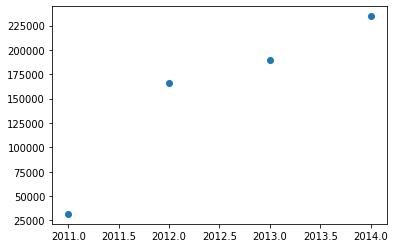

In [33]:
plt.scatter(X,y)

In [34]:
from sklearn.linear_model import LinearRegression

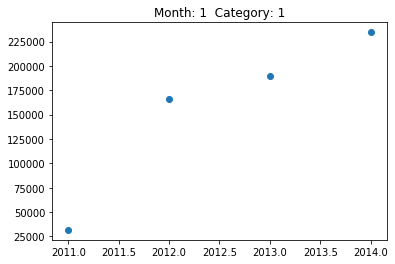

0.8750252634795093


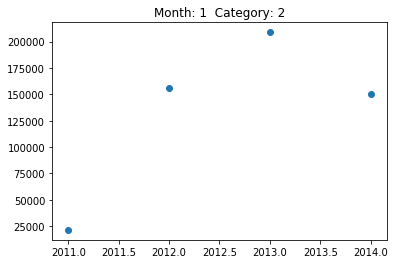

0.5095025743707831


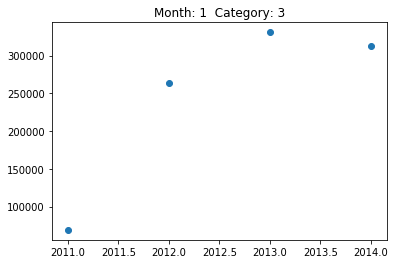

0.7384892500426986


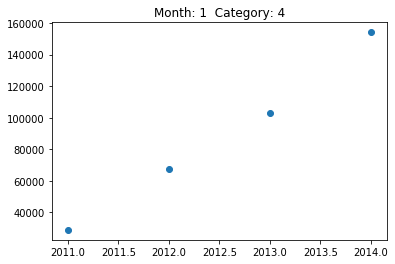

0.9934934660373894


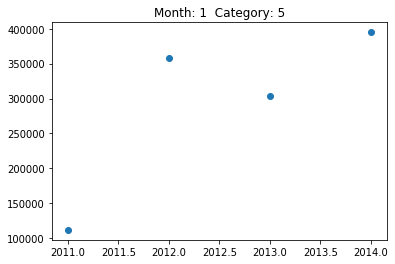

0.6627627917915234


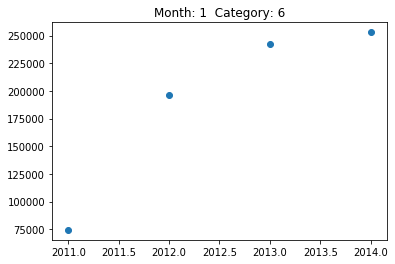

0.8422991066758644


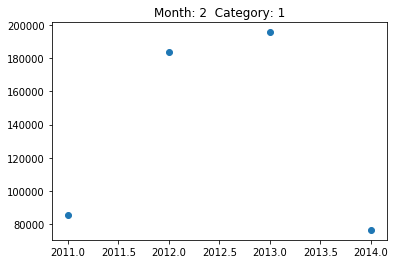

0.0009011992521563704


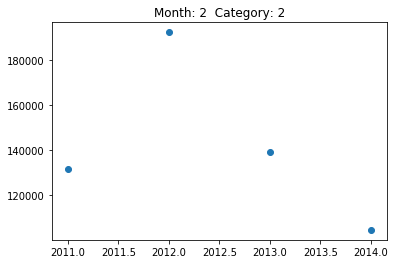

0.22238860364615642


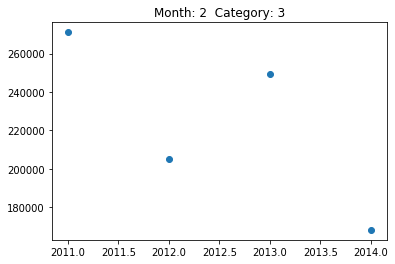

0.5515145025699495


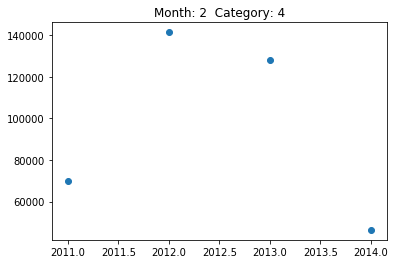

0.05667199872834549


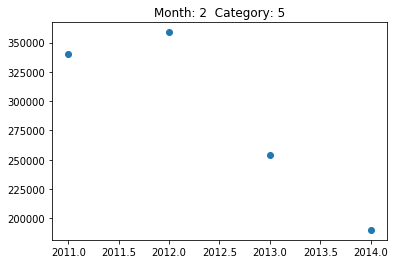

0.8348006028003316


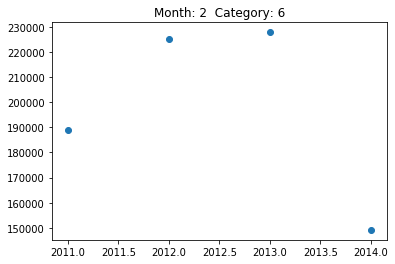

0.16611695371384694


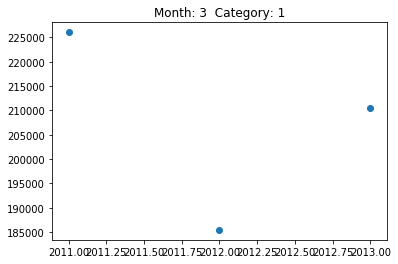

0.14381271560846098


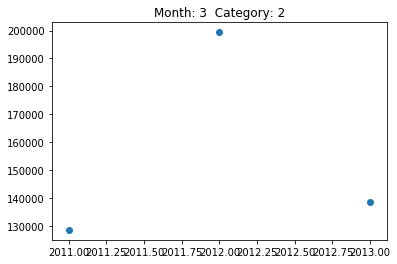

0.016445979119351084


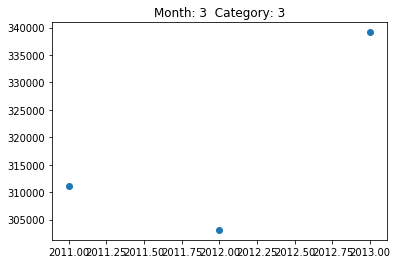

0.5488162341157045


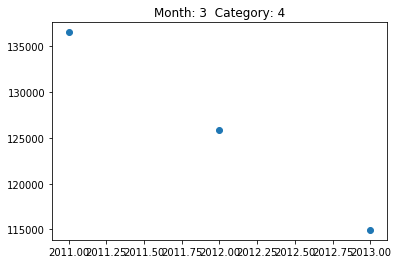

0.9999714316251078


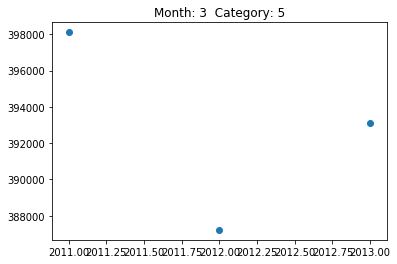

0.20855045488435098


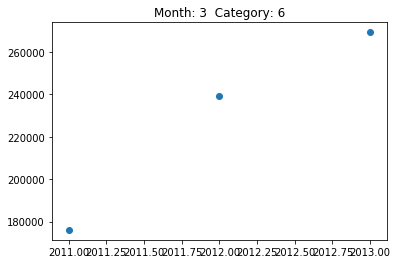

0.9594842627103055


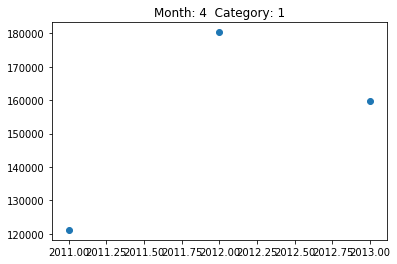

0.4140773117164569


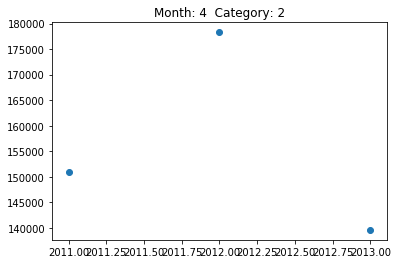

0.0819874897193541


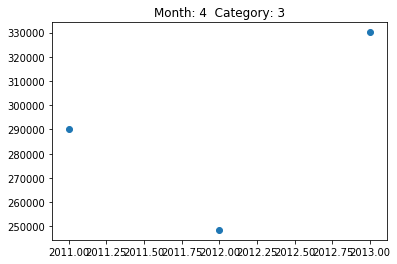

0.2419699286582201


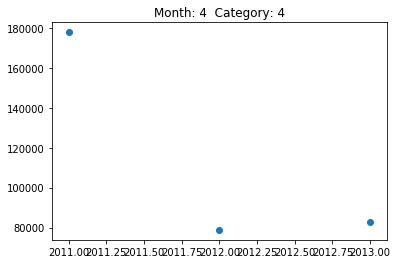

0.718822612562813


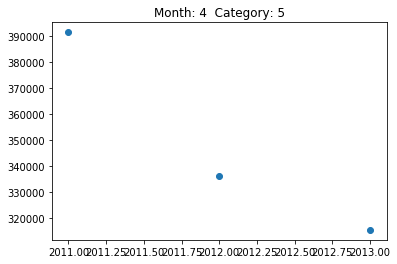

0.9351333666034117


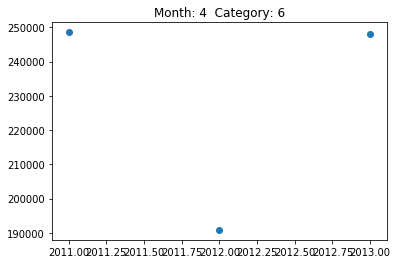

5.1673154960352186e-05


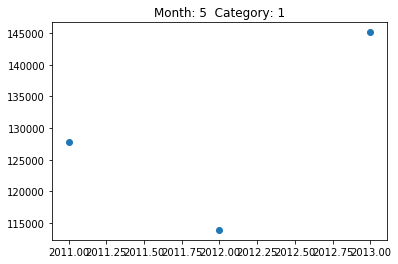

0.3055215960756291


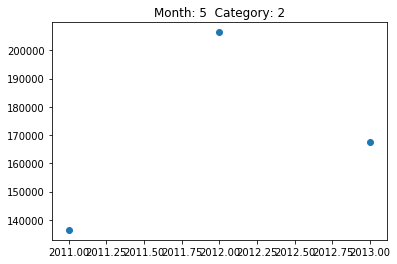

0.19728789849423578


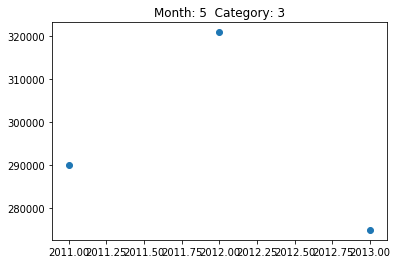

0.1033457825044104


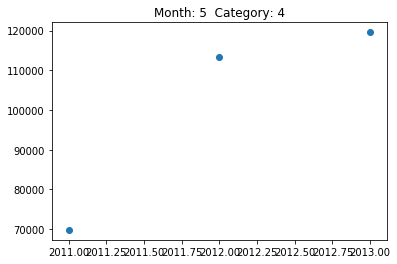

0.8405628568254266


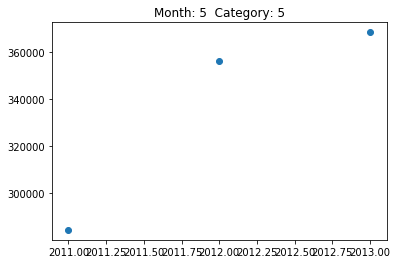

0.8577779553087028


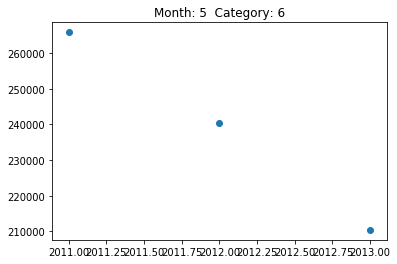

0.9978985473468737


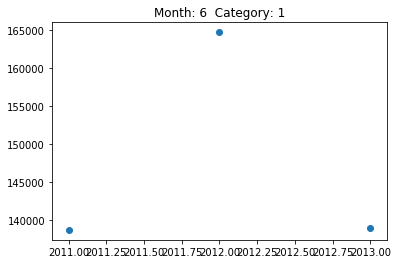

4.738154883443535e-05


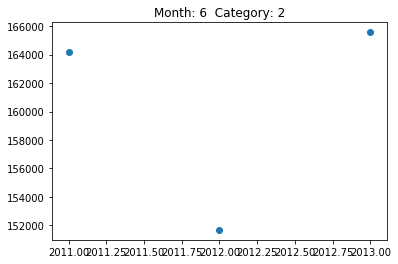

0.00843446074911447


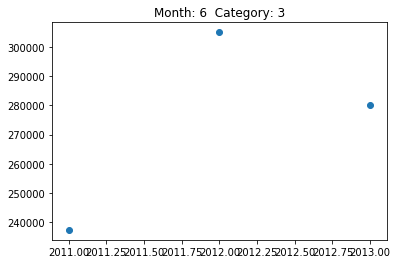

0.3899286734318399


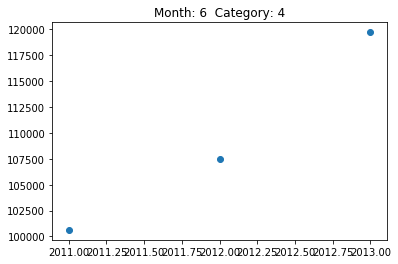

0.973553179074625


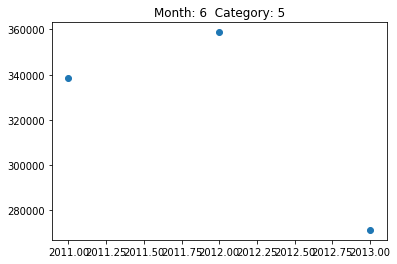

0.5407510819630064


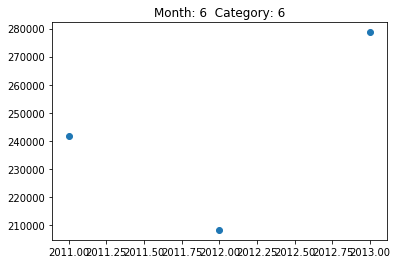

0.276249850909846


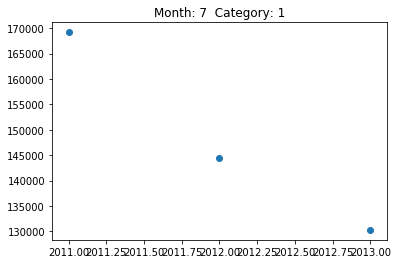

0.9763652419426063


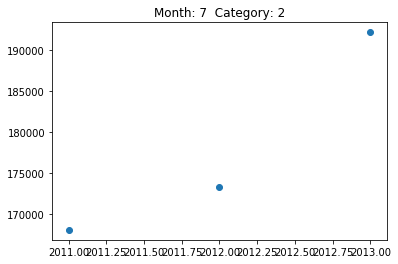

0.9047649898037673


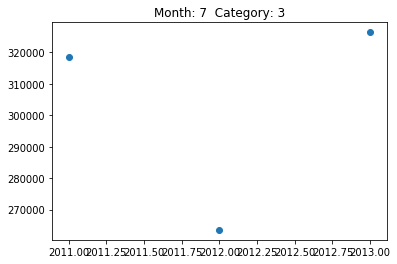

0.012864868591786593


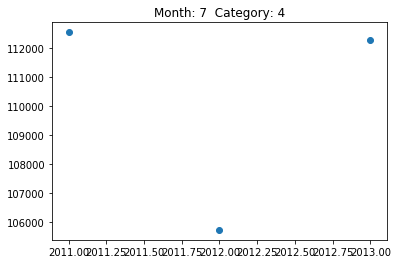

0.001355790295457182


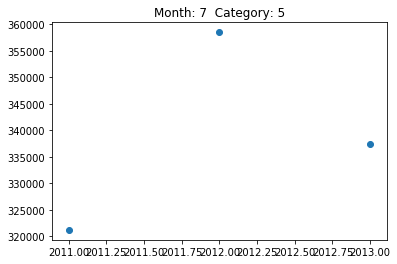

0.1889650806099067


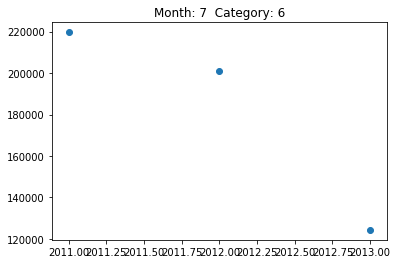

0.8902783602027035


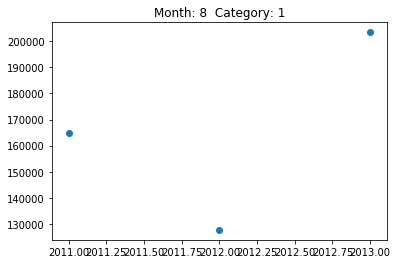

0.26141882330990707


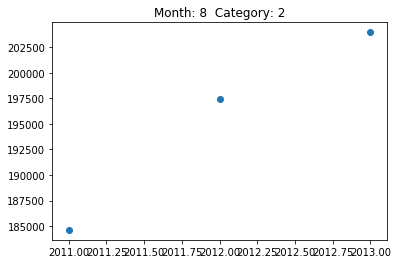

0.9663772982139688


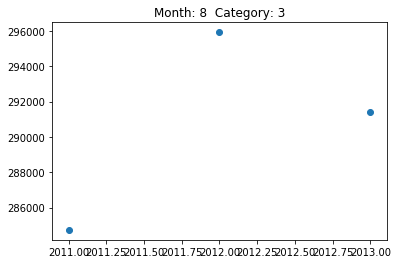

0.3516863998689429


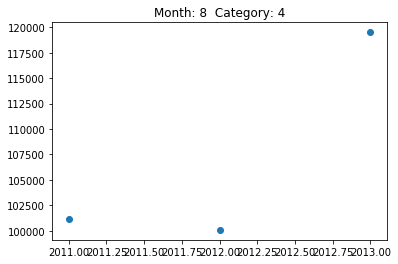

0.7082813521111364


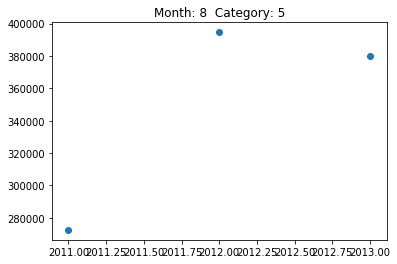

0.6498881979310795


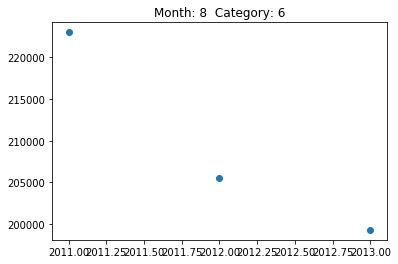

0.9294144413733675


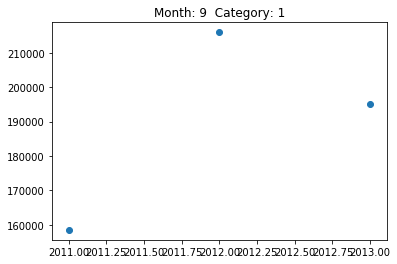

0.3946084599703671


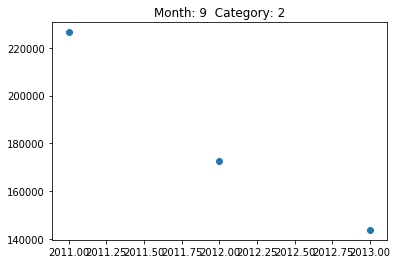

0.9709594458245411


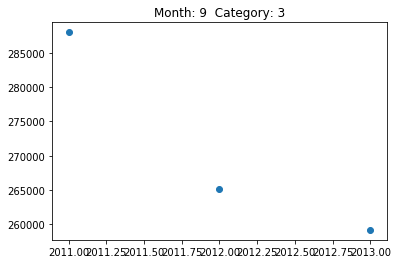

0.8959059420523402


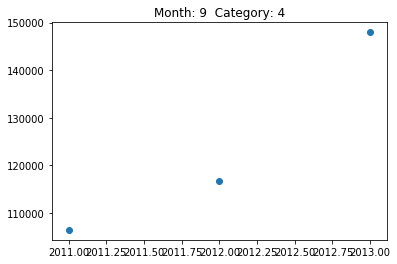

0.9212368347055684


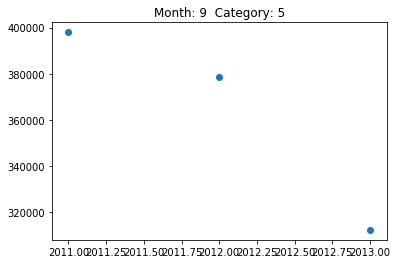

0.9084322375901412


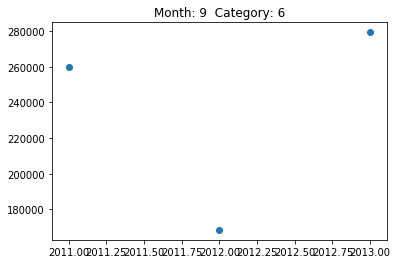

0.027779809407238898


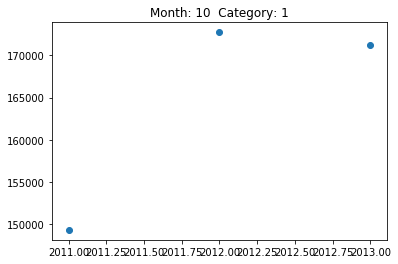

0.6995884790294797


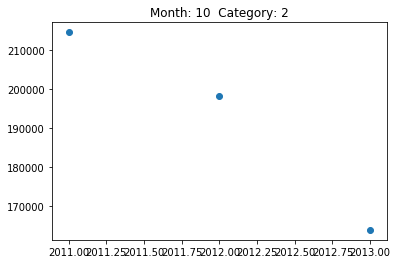

0.9597049704977979


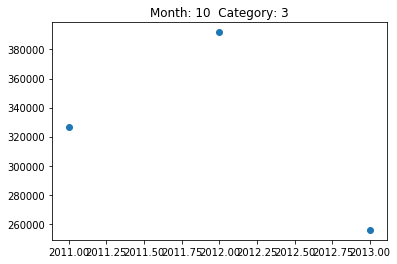

0.26917468038786707


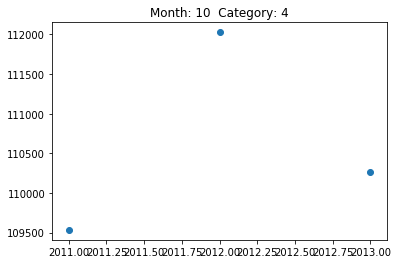

0.08147196495662869


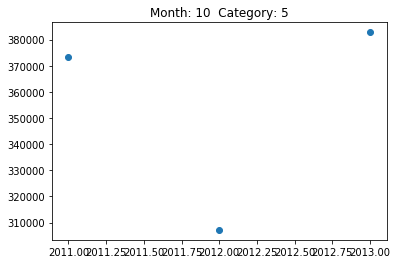

0.013330566136392052


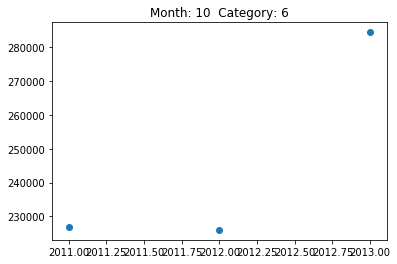

0.7383620263308812


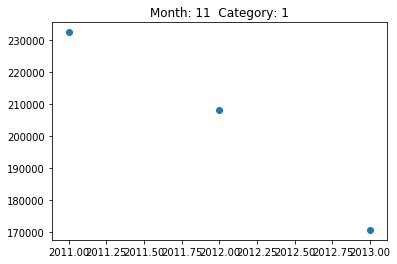

0.9854618493199981


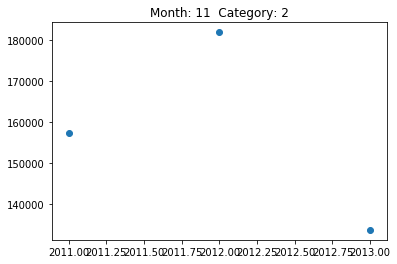

0.2392889063204937


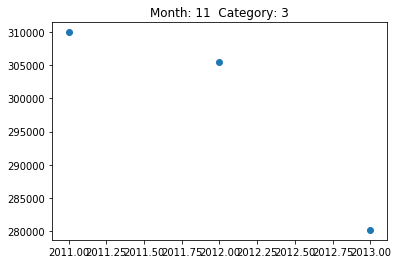

0.8599403610875438


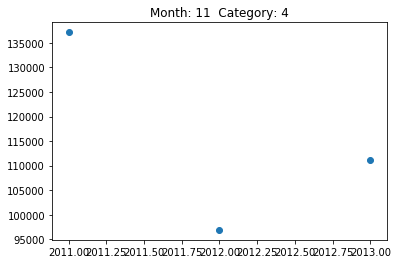

0.40787453156719067


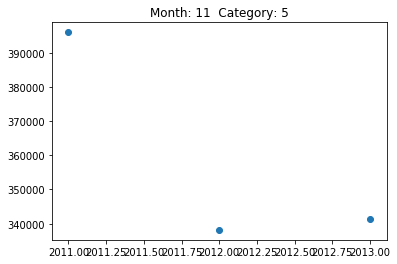

0.70619757200342


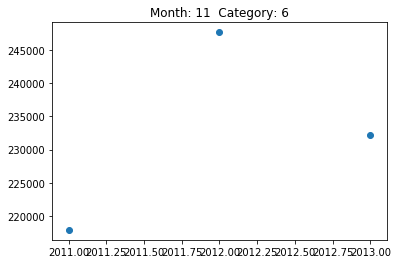

0.23285351934474177


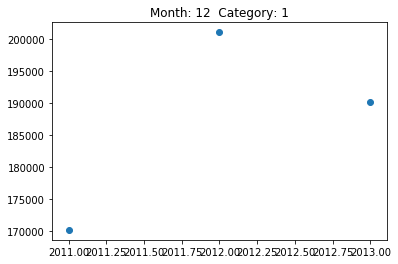

0.40925174018998167


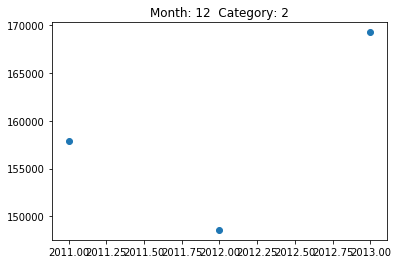

0.2998471980682149


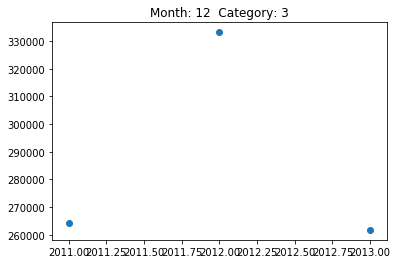

0.0008739292673080046


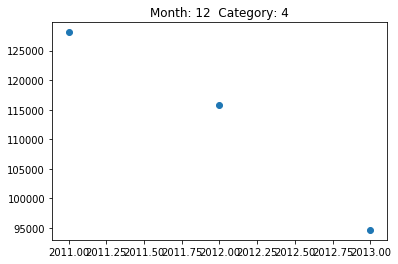

0.9766410819234534


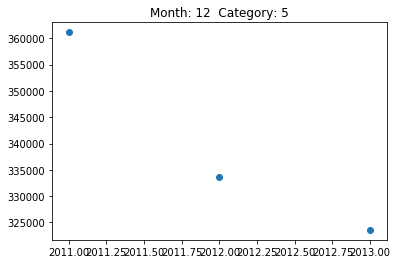

0.9330477382027825


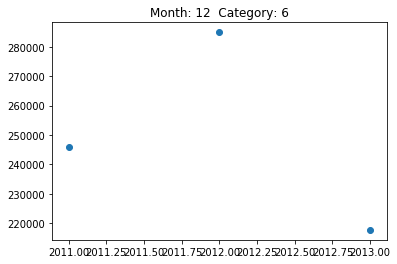

0.1743853027204051


In [45]:
month=[1,2,3,4,5,6,7,8,9,10,11,12]
category=[1,2,3,4,5,6]

for each_month in month:
    for each_cat in category:
        new_data= data.loc[(data["transaction_month"]==each_month) & (data["prod_cat_code"]==each_cat)]
        new_data=new_data.groupby(['transaction_year']).sum()
        new_data=new_data.reset_index()
        
        
        
        X=new_data['transaction_year'].values.reshape(-1,1)
        y=new_data['total_amt'].values.reshape(-1,1)
        
        plt.scatter(X,y)
        plt.title(f"Month: {each_month}  Category: {each_cat}")
        plt.show()
        
        model=LinearRegression()
        model.fit(X,y)
        print(model.score(X,y))
        

In [ ]:
## for each year create a line chart of total_amt by month
## for each year create a line chart for each category total_amt by month

In [ ]:
## the below cell plots each category by month for each year
## very few months show a linear pattern from year to year

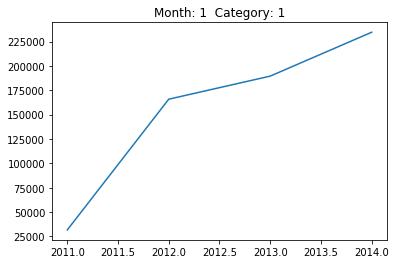

0.8750252634795093
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


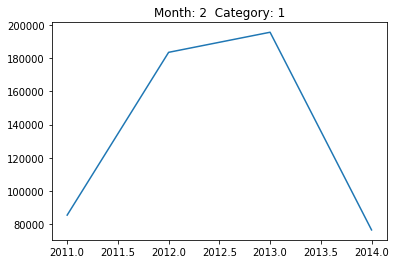

0.0009011992521563704
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


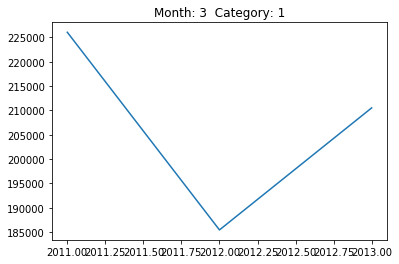

0.14381271560846098
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


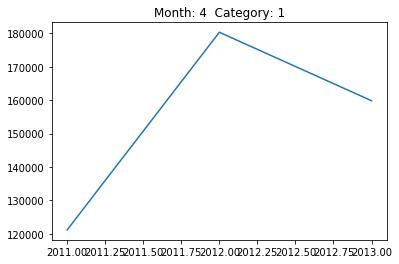

0.4140773117164569
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


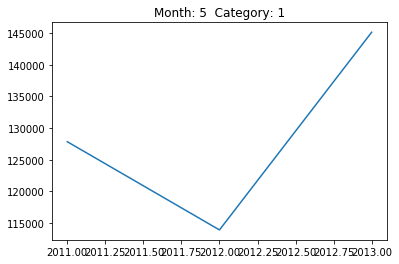

0.3055215960756291
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


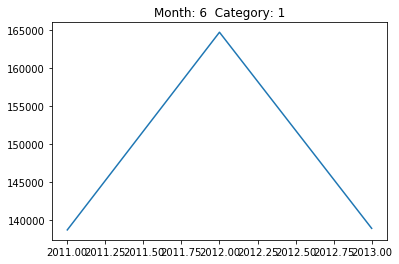

4.738154883443535e-05
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


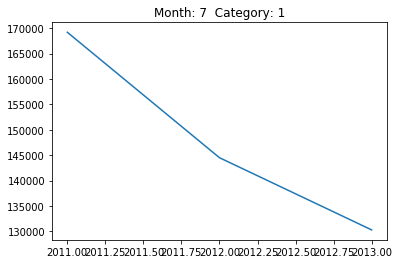

0.9763652419426063
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


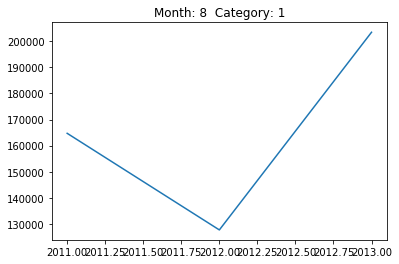

0.26141882330990707
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


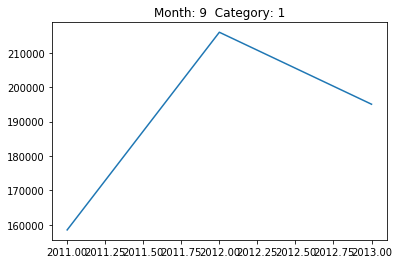

0.3946084599703671
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


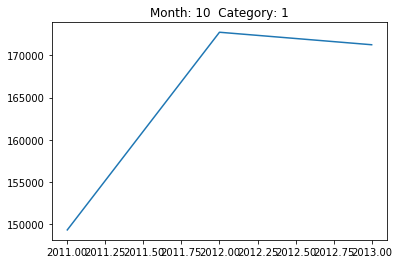

0.6995884790294797
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


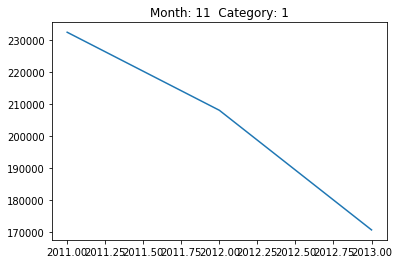

0.9854618493199981
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


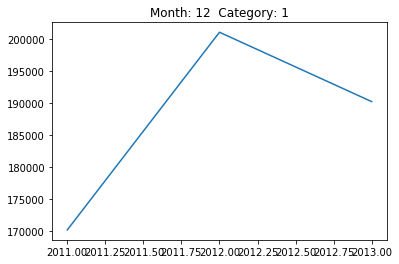

0.40925174018998167
nan


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


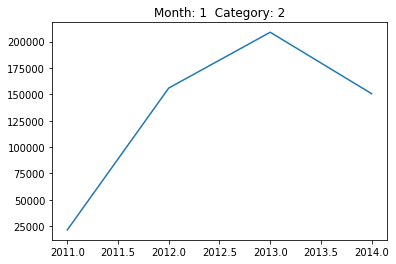

0.5095025743707831


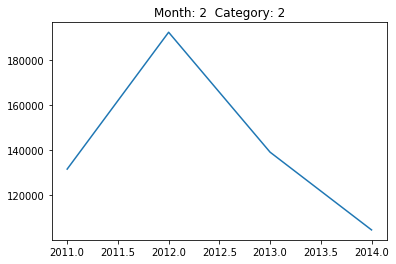

0.22238860364615642


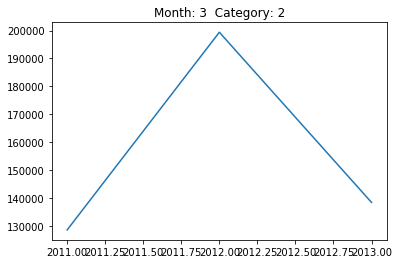

0.016445979119351084


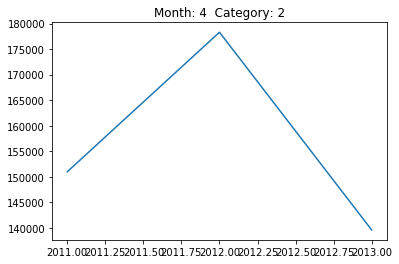

0.0819874897193541


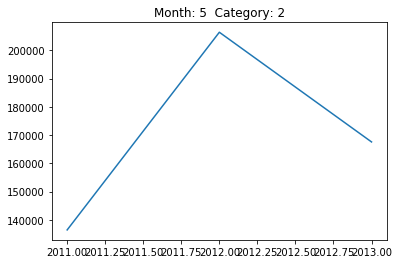

0.19728789849423578


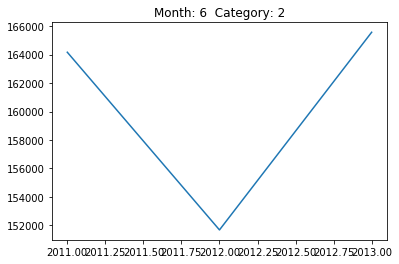

0.00843446074911447


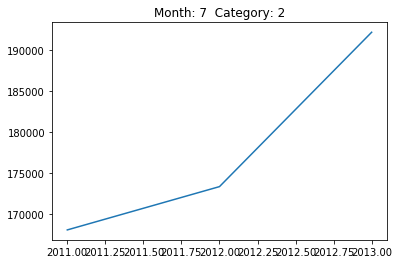

0.9047649898037673


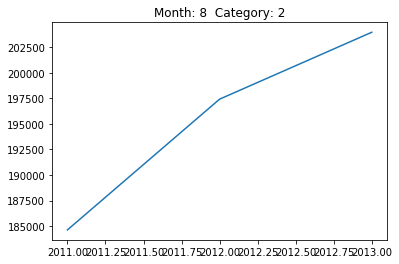

0.9663772982139688


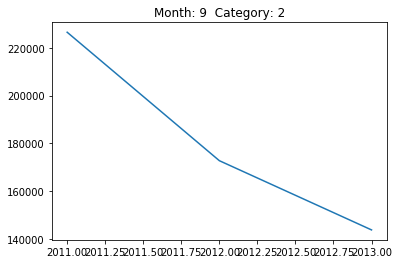

0.9709594458245411


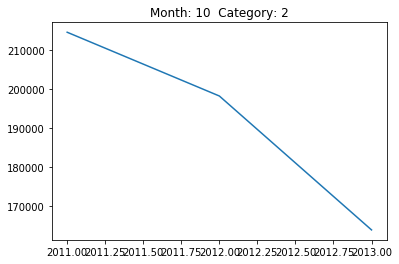

0.9597049704977979


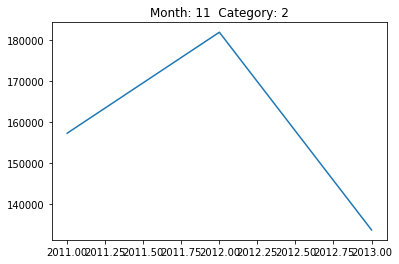

0.2392889063204937


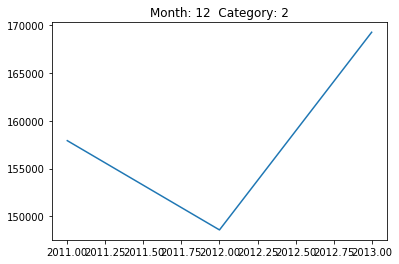

0.2998471980682149


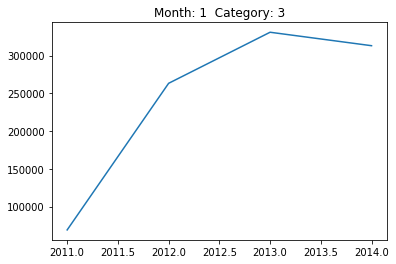

0.7384892500426986


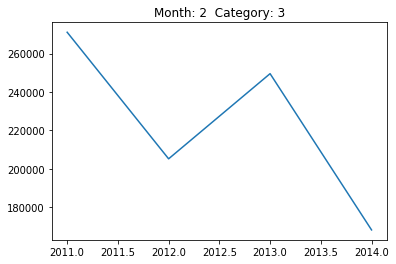

0.5515145025699495


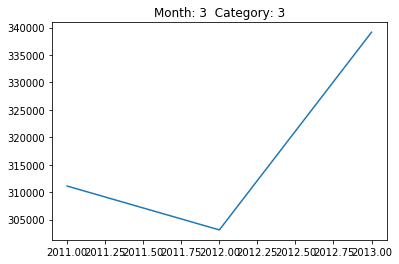

0.5488162341157045


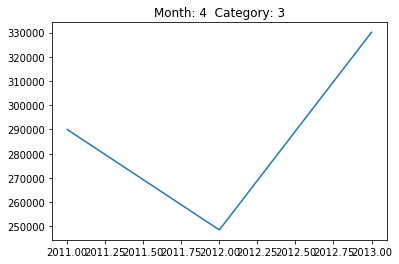

0.2419699286582201


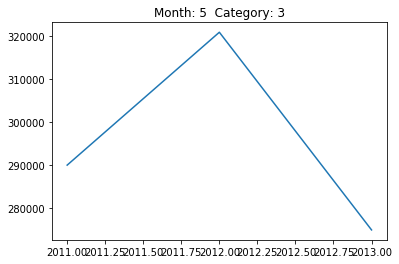

0.1033457825044104


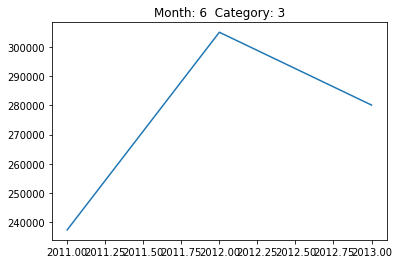

0.3899286734318399


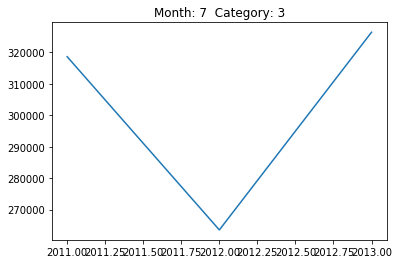

0.012864868591786593


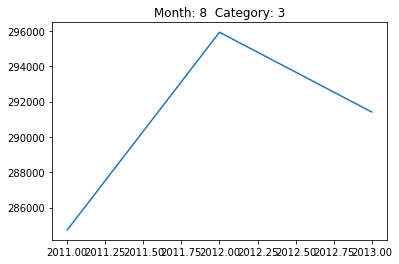

0.3516863998689429


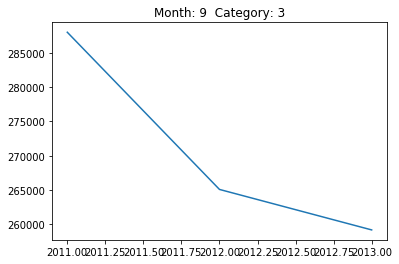

0.8959059420523402


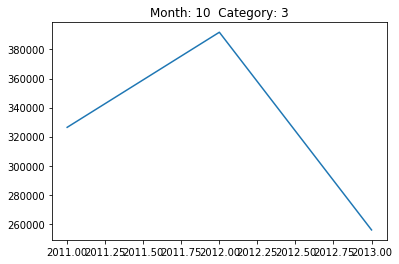

0.26917468038786707


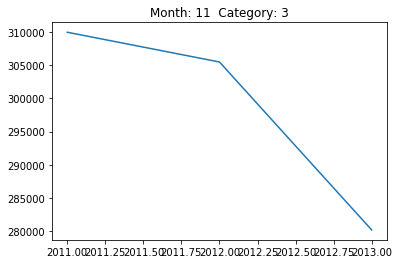

0.8599403610875438


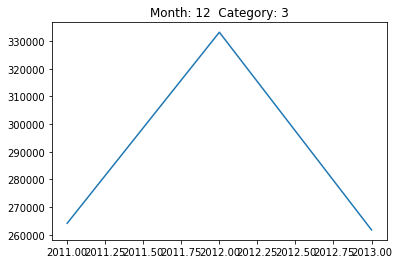

0.0008739292673080046


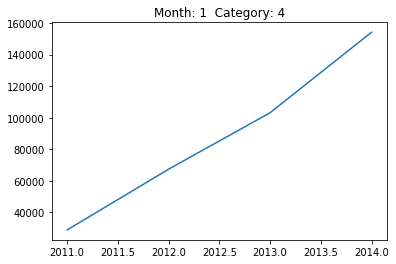

0.9934934660373894


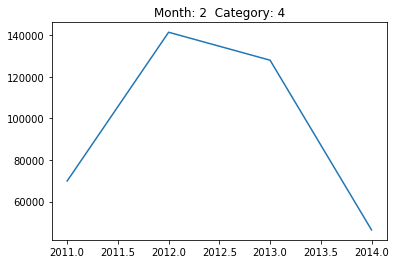

0.05667199872834549


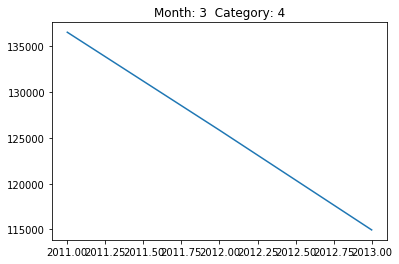

0.9999714316251078


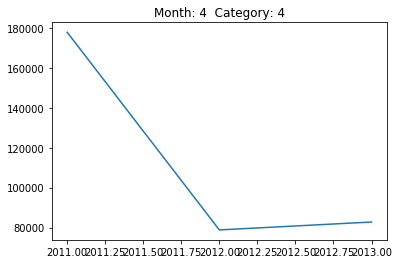

0.718822612562813


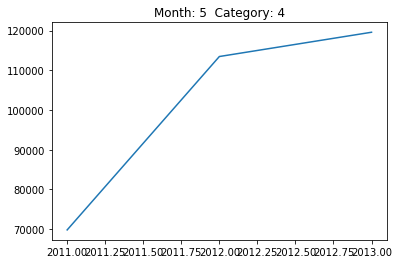

0.8405628568254266


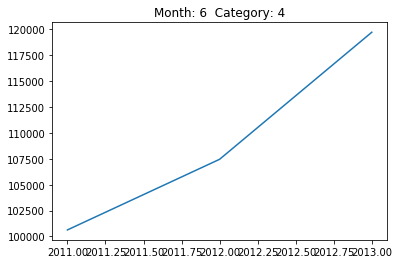

0.973553179074625


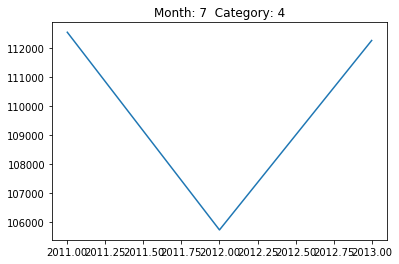

0.001355790295457182


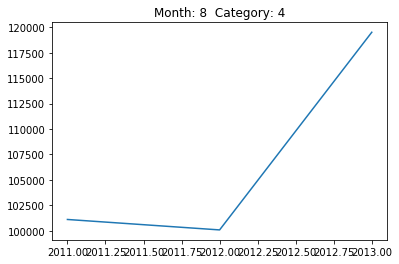

0.7082813521111364


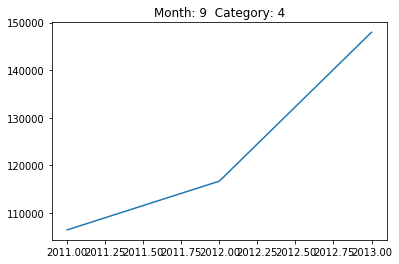

0.9212368347055684


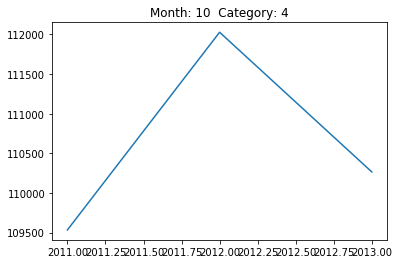

0.08147196495662869


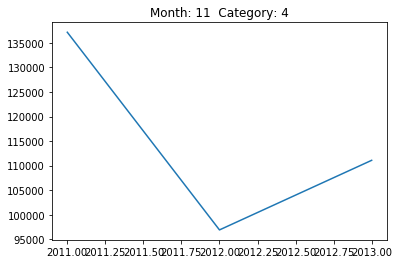

0.40787453156719067


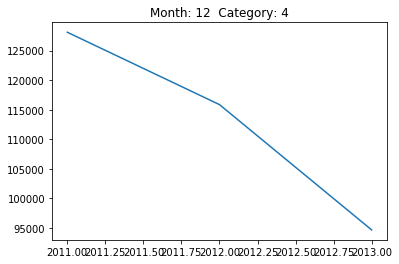

0.9766410819234534


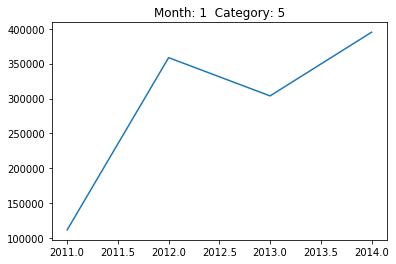

0.6627627917915234


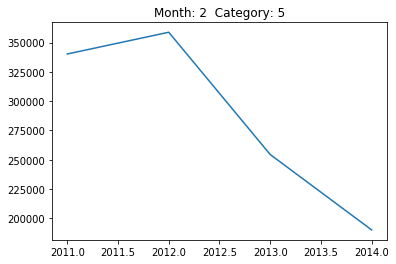

0.8348006028003316


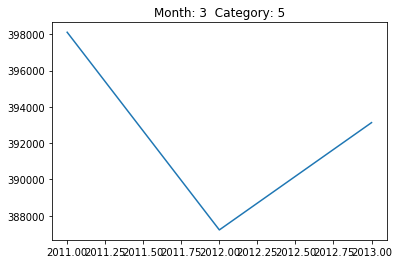

0.20855045488435098


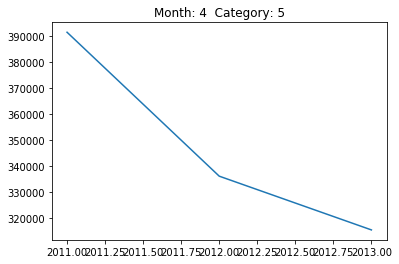

0.9351333666034117


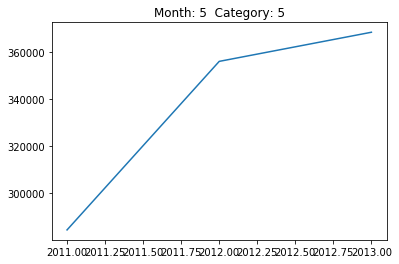

0.8577779553087028


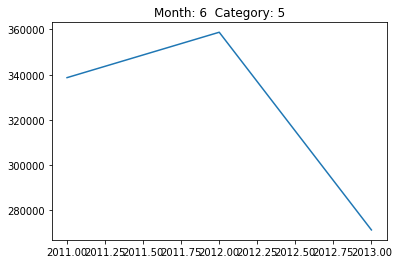

0.5407510819630064


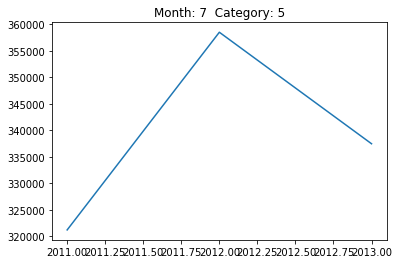

0.1889650806099067


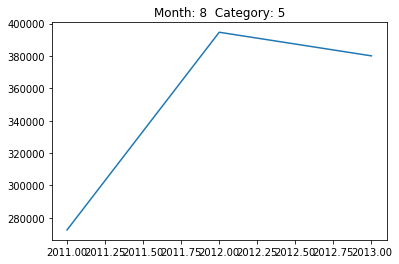

0.6498881979310795


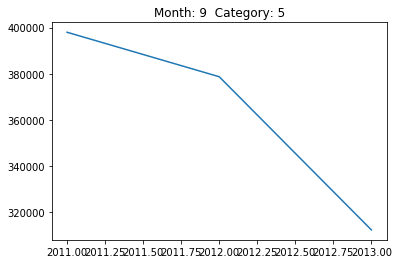

0.9084322375901412


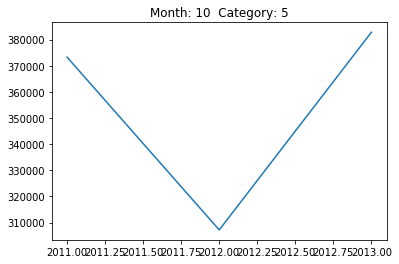

0.013330566136392052


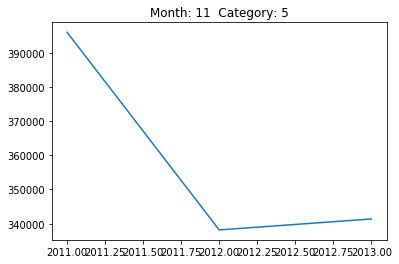

0.70619757200342


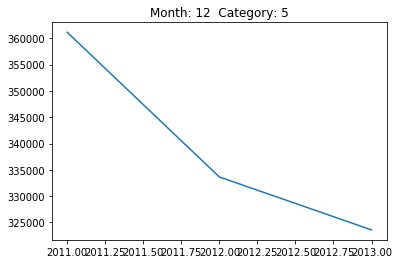

0.9330477382027825


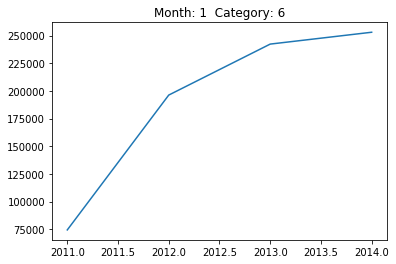

0.8422991066758644


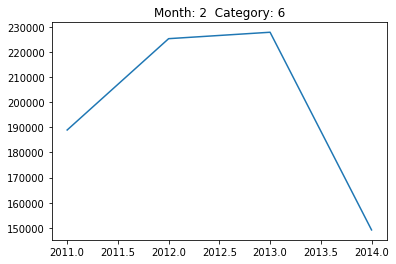

0.16611695371384694


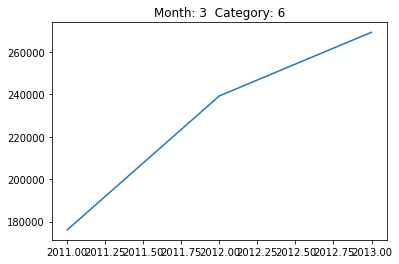

0.9594842627103055


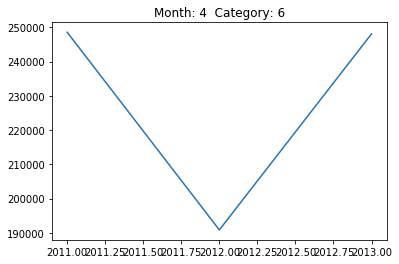

5.1673154960352186e-05


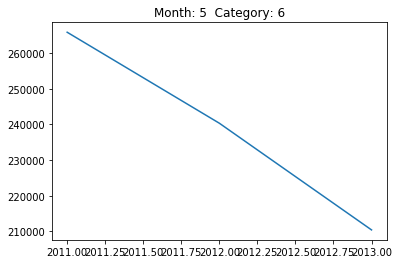

0.9978985473468737


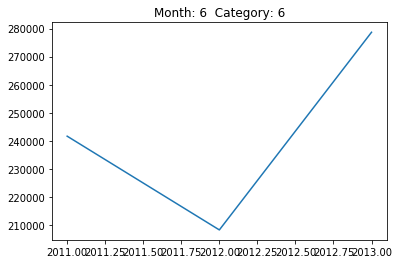

0.276249850909846


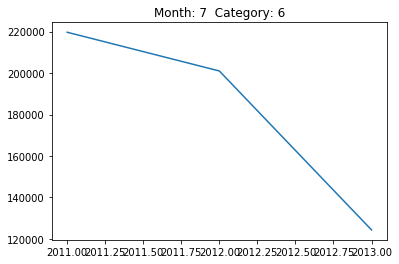

0.8902783602027035


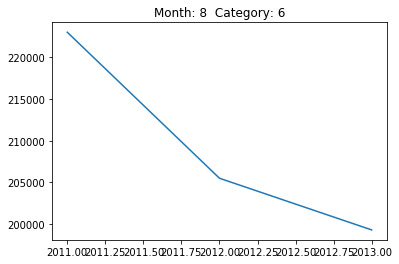

0.9294144413733675


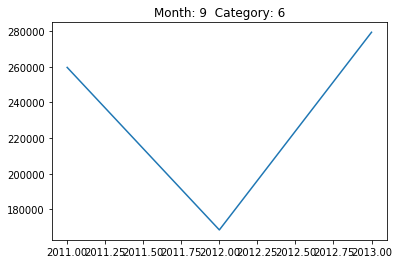

0.027779809407238898


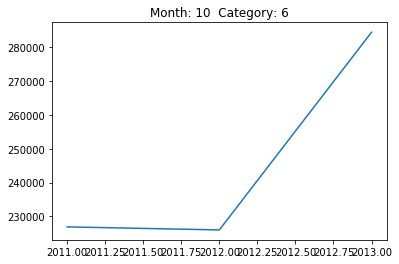

0.7383620263308812


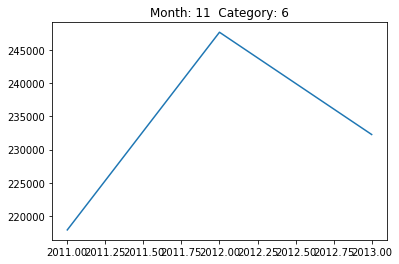

0.23285351934474177


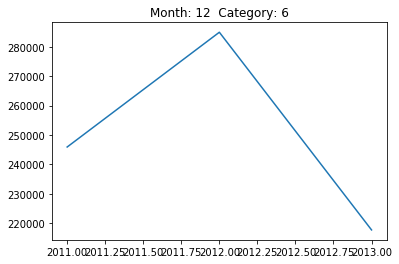

0.1743853027204051


In [73]:
month=[1,2,3,4,5,6,7,8,9,10,11,12]
category=[1,2,3,4,5,6]
cat1_predictions=[]
cat1_scores=[]
cat2_predictions=[]
cat2_scores=[]
cat3_predictions=[]
cat3_scores=[]
cat4_predictions=[]
cat4_scores=[]
cat5_predictions=[]
cat5_scores=[]
cat6_predictions=[]
cat6_scores=[]

for each_cat in category:
    for each_month in month:
        new_data= data.loc[(data["transaction_month"]==each_month) & (data["prod_cat_code"]==each_cat)]
        new_data=new_data.groupby(['transaction_year']).sum()
        new_data=new_data.reset_index()
        
        
        
        X=new_data['transaction_year'].values.reshape(-1,1)
        y=new_data['total_amt'].values.reshape(-1,1)
        
        plt.plot(X,y)
        plt.title(f"Month: {each_month}  Category: {each_cat}")
        plt.show()
        
        model=LinearRegression()
        model.fit(X,y)
        print(model.score(X,y))
        
        if each_cat == 1:
            prediction=model.predict([[2014]])
            cat1_predictions.append(prediction)
            score=model.score([[2014]], prediction)
            print(score)
            
        elif each_cat == 2:
            prediction=model.predict([[2014]])
            cat2_predictions.append(prediction)
            
        elif each_cat == 3:
            prediction=model.predict([[2014]])
            cat3_predictions.append(prediction)
            
        elif each_cat == 4:
            prediction=model.predict([[2014]])
            cat4_predictions.append(prediction)
            
        elif each_cat == 5:
            prediction=model.predict([[2014]])
            cat5_predictions.append(prediction)
            
        elif each_cat == 6:
            prediction=model.predict([[2014]])
            cat6_predictions.append(prediction)

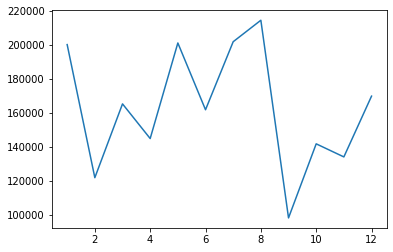

In [91]:
X=(1,2,3,4,5,6,7,8,9,10,11,12)
y=cat2_predictions

plt.plot(X,[x[0][0] for x in cat2_predictions])

In [90]:
[x[0][0] for x in cat2_predictions]

[200297.0515000075,
 121826.91299999878,
 165340.04499999993,
 144907.12166666798,
 201255.12333333492,
 161878.81666666665,
 201987.37000000104,
 214652.14333333448,
 98103.37333333492,
 141783.6550000012,
 134068.5450000018,
 169899.27500000037]

In [88]:
[x[0][0] for x in cat2_predictions]

TypeError: list indices must be integers or slices, not tuple

In [76]:
cat2_predictions

[array([[200297.05150001]]),
 array([[121826.913]]),
 array([[165340.045]]),
 array([[144907.12166667]]),
 array([[201255.12333333]]),
 array([[161878.81666667]]),
 array([[201987.37]]),
 array([[214652.14333333]]),
 array([[98103.37333333]]),
 array([[141783.655]]),
 array([[134068.545]]),
 array([[169899.275]])]

In [ ]:
########   Scores are nan
#######    cat2_predictions  wil not create a line plot  (only scatter)